In [618]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

df = pd.concat([train_df, test_df])

df.head()

C:\Users\Me\AppData\Local\Temp\ipykernel_240\2550281946.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [660]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 

**1. Data Cleaning and Preprocessing:**
So many missing values, we will need to treat each column depending on the nature of the data in each column and the overall context of your project.

In [620]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Name                       15000
Monthly_Inhand_Salary      22500
Type_of_Loan               17112
Num_of_Delayed_Payment     10500
Num_Credit_Inquiries        3000
Credit_History_Age         13500
Amount_invested_monthly     6750
Monthly_Balance             1762
Credit_Score               50000
dtype: int64

In [621]:
#<--Name-->
name_value_counts = df['Name'].value_counts()
top_names = name_value_counts.head(10)
num_unique_names = df['Name'].nunique()

df = df.copy()
df['Name'].fillna('J. Doe', inplace=True)
df['Name'].isnull().sum()

top_names, num_unique_names


(Name
 Stevex                66
 Langep                65
 Jessicad              59
 Vaughanl              58
 Raymondr              58
 Deepa Seetharamanm    58
 Jessica Wohlt         57
 Nicko                 57
 Ronald Groverk        56
 Jonesb                55
 Name: count, dtype: int64,
 10139)

In [622]:
# <--Monthly_Inhand_Salary--> cell 1
salary_distribution = df['Monthly_Inhand_Salary'].describe()
print(salary_distribution)

df['Monthly_Inhand_Salary'].isna().sum()



count    127500.000000
mean       4190.115139
std        3180.489657
min         303.645417
25%        1625.265833
50%        3091.000000
75%        5948.454596
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


22500

In [623]:
# <--Monthly_Inhand_Salary--> cell 2
median_salary = df['Monthly_Inhand_Salary'].median() #<--- given the distribution of the "Monthly_Inhand_Salary" column. see(Skewed Distribution, Range Values, Median value)
df['Monthly_Inhand_Salary'].fillna(median_salary, inplace=True)
salary_distribution = df['Monthly_Inhand_Salary'].describe()
salary_distribution

count    150000.000000
mean       4025.247868
std        2958.412598
min         303.645417
25%        1792.520417
50%        3091.000000
75%        5363.071667
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [624]:
# <--Type of Loan-->
loan_type_counts = df['Type_of_Loan'].value_counts()

top_loan_types = loan_type_counts.head(10)
num_unique_loan_types = df['Type_of_Loan'].nunique()

df['Type_of_Loan'].isna().sum()


df['Type_of_Loan'].fillna('Not Specified', inplace=True)   #<--- given the distribution of the "Type_of_Loan" column. see(Not Specified, Range Values)


top_loan_types, num_unique_loan_types


(Type_of_Loan
 Not Specified                      2112
 Credit-Builder Loan                1920
 Personal Loan                      1908
 Debt Consolidation Loan            1896
 Student Loan                       1860
 Payday Loan                        1800
 Mortgage Loan                      1764
 Auto Loan                          1728
 Home Equity Loan                   1704
 Personal Loan, and Student Loan     480
 Name: count, dtype: int64,
 6260)

In [625]:
# <--Number of Delayed Payments-->
data_type_delayed_payments = df['Num_of_Delayed_Payment'].dtype

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce') #<--- numbers into numeric types
skewness_delayed_payments = df['Num_of_Delayed_Payment'].skew()
summary_delayed_payments = df['Num_of_Delayed_Payment'].describe()

data_type_delayed_payments, skewness_delayed_payments, summary_delayed_payments


(dtype('O'),
 14.336422664155652,
 count    135329.000000
 mean         30.937020
 std         224.723576
 min          -3.000000
 25%           9.000000
 50%          14.000000
 75%          18.000000
 max        4399.000000
 Name: Num_of_Delayed_Payment, dtype: float64)

In [626]:
# <--Number of Delayed Payments--> cell 2
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: 0 if x < 0 else x)

percentile_95 = df['Num_of_Delayed_Payment'].quantile(0.95)  #<--- reducing the impact of extreme outliers
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: percentile_95 if x > percentile_95 else x)

median_delayed_payments = df['Num_of_Delayed_Payment'].median()
df['Num_of_Delayed_Payment'].fillna(median_delayed_payments, inplace=True)

new_summary_delayed_payments = df['Num_of_Delayed_Payment'].describe()
new_summary_delayed_payments


count    150000.000000
mean         13.443027
std           5.947961
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          24.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [627]:
# <--Number of Credit inquires --> cell 1
skewness_credit_inquiries = df['Num_Credit_Inquiries'].skew()
distribution_credit_inquiries = df['Num_Credit_Inquiries'].describe()

skewness_credit_inquiries, distribution_credit_inquiries


(9.718317423718114,
 count    147000.000000
 mean         28.529014
 std         194.456058
 min           0.000000
 25%           3.000000
 50%           6.000000
 75%           9.000000
 max        2597.000000
 Name: Num_Credit_Inquiries, dtype: float64)

In [628]:
# <--Number of Credit inquires --> cell 2

# <- 9.72 Skewness, highly right skewed, and precense of outliers
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: 0 if x < 0 else x)
new_skewness_credit_inquiries2 = df['Num_Credit_Inquiries'].skew()

percentile_95_inquiries = df['Num_Credit_Inquiries'].quantile(0.95)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(lambda x: percentile_95_inquiries if x > percentile_95_inquiries else x)

median_credit_inquiries = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median_credit_inquiries, inplace=True)

new_summary_credit_inquiries = df['Num_Credit_Inquiries'].describe()
new_summary_credit_inquiries, new_skewness_credit_inquiries2


(count    150000.000000
 mean          6.365160
 std           3.918386
 min           0.000000
 25%           3.000000
 50%           6.000000
 75%           9.000000
 max          14.000000
 Name: Num_Credit_Inquiries, dtype: float64,
 9.718317423718114)

In [629]:
# <--Years of Credit History--> cell 1

def convert_to_total_months(age_str):
    if pd.isna(age_str):
        return None
    parts = age_str.split(' ')
    years = int(parts[0]) if parts[0].isdigit() else 0
    months = int(parts[3]) if len(parts) > 3 and parts[3].isdigit() else 0
    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_total_months)
credit_history_age_skewness = df['Credit_History_Age'].skew()
credit_history_age_distribution = df['Credit_History_Age'].describe()
credit_history_age_distribution, credit_history_age_skewness



(count    136500.000000
 mean        223.215326
 std          99.719548
 min           1.000000
 25%         146.000000
 50%         222.000000
 75%         304.000000
 max         408.000000
 Name: Credit_History_Age, dtype: float64,
 -0.048023953162607956)

In [630]:
# <--Years of Credit History--> cell 2
median_credit_history = df['Credit_History_Age'].median()
df['Credit_History_Age'].fillna(median_credit_history, inplace=True)
new_skewness_credit_history = df['Credit_History_Age'].skew()
new_summary_credit_history = df['Credit_History_Age'].describe()
new_summary_credit_history, new_skewness_credit_history

(count    150000.000000
 mean        223.105947
 std          95.126991
 min           1.000000
 25%         156.000000
 50%         222.000000
 75%         294.000000
 max         408.000000
 Name: Credit_History_Age, dtype: float64,
 -0.04689238942885576)

In [631]:
# <-- Amount invested monthly --> cell 1
# convert  to a numeric format
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

amount_invested_distribution = df['Amount_invested_monthly'].describe()
amount_invested_skewness = df['Amount_invested_monthly'].skew()
amount_invested_distribution, amount_invested_skewness


(count    136770.000000
 mean        195.305028
 std         198.599612
 min           0.000000
 25%          72.232194
 50%         128.984784
 75%         236.844304
 max        1977.326102
 Name: Amount_invested_monthly, dtype: float64,
 2.5295788801444172)

In [632]:
# <-- Amount invested monthly --> cell 2
median_amount_invested = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_amount_invested, inplace=True)

new_summary_amount_invested = df['Amount_invested_monthly'].describe()
new_skewness_amount_invested = df['Amount_invested_monthly'].skew()
new_summary_amount_invested, new_skewness_amount_invested


(count    150000.000000
 mean        189.455583
 std         190.569511
 min           0.000000
 25%          77.018550
 50%         128.984784
 75%         220.228565
 max        1977.326102
 Name: Amount_invested_monthly, dtype: float64,
 2.6988854845756545)

In [633]:
# <-- Monthly balance --> cell 1
unique = df['Monthly_Balance'].nunique()
unique

# converted to a numeric format
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

monthly_balance_distribution = df['Monthly_Balance'].describe()
monthly_balance_skewness = df['Monthly_Balance'].skew()
monthly_balance_distribution, monthly_balance_skewness, unique


(count    148223.000000
 mean        402.723009
 std         213.844776
 min           0.007760
 25%         270.241882
 50%         336.815865
 75%         470.477895
 max        1606.518192
 Name: Monthly_Balance, dtype: float64,
 1.5905121038295311,
 148224)

In [634]:
# <-- Monthly balance --> cell 2
median_monthly_balance = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median_monthly_balance, inplace=True)

new_summary_monthly_balance = df['Monthly_Balance'].describe()
new_skewness_monthly_balance = df['Monthly_Balance'].skew()
new_summary_monthly_balance, new_skewness_monthly_balance


(count    150000.000000
 mean        401.942229
 std         212.693891
 min           0.007760
 25%         270.971064
 50%         336.815865
 75%         467.988694
 max        1606.518192
 Name: Monthly_Balance, dtype: float64,
 1.6079810825933205)

In [635]:
# <-- Credit Score -->
checktarget = df['Credit_Score'].isnull().sum()
target = df['Credit_Score'].describe()
target, checktarget

# I realized that the Credit_Score column values from test set were NaN, so I will split the data into train and test sets based on the Credit_Score column


(count       100000
 unique           3
 top       Standard
 freq         53174
 Name: Credit_Score, dtype: object,
 50000)

In [636]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0] #<--- missing values are from test dataset which we merged with train dataset

Credit_Score    50000
dtype: int64

**1. Data Cleaning and Preprocessing:** Moving into converting categorical data into more suitable format

In [637]:
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN']
df = df.drop(columns=columns_to_drop) #<--- dropping columns that are not needed
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [638]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_collumns_head = df.select_dtypes(include=['object', 'category']).describe()
categorical_columns_summary = {col: df[col].nunique() for col in categorical_columns}
categorical_columns_summary, categorical_collumns_head

({'Month': 12,
  'Age': 2524,
  'Occupation': 16,
  'Annual_Income': 21192,
  'Num_of_Loan': 623,
  'Type_of_Loan': 6260,
  'Changed_Credit_Limit': 4605,
  'Credit_Mix': 4,
  'Outstanding_Debt': 13622,
  'Payment_of_Min_Amount': 3,
  'Payment_Behaviour': 7,
  'Credit_Score': 3},
           Month     Age Occupation Annual_Income Num_of_Loan   Type_of_Loan  \
 count    150000  150000     150000        150000      150000         150000   
 unique       12    2524         16         21192         623           6260   
 top     January      39    _______      36585.12           3  Not Specified   
 freq      12500    4198      10500            24       21500          19224   
 
        Changed_Credit_Limit Credit_Mix Outstanding_Debt Payment_of_Min_Amount  \
 count                150000     150000           150000                150000   
 unique                 4605          4            13622                     3   
 top                       _   Standard          1360.45                

In [639]:
nominal_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_Behaviour'] #<--- nominal columns
df = pd.get_dummies(df, columns=nominal_columns)

label_encoder = LabelEncoder() #<--- ordinal columns
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

numerical_columns = ['Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Age'] #<--- numerical columns
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')


In [640]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ', '').str.split(', ')

mlb = MultiLabelBinarizer()

loan_types_encoded = mlb.fit_transform(df['Type_of_Loan']) #<--- multilabel binarizer. Type_of_Loan column has multiple values per row. e.g (Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan)
loan_types_df = pd.DataFrame(loan_types_encoded, columns=mlb.classes_)

df = df.join(loan_types_df)

df.drop('Type_of_Loan', axis=1, inplace=True)

df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Small_value_payments,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,23,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,False,1,1,0,1,0,0,0,1,0
0,23,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,True,1,1,0,1,0,0,0,1,0
1,23,19114.12,3091.000000,3,4,3,4.0,-1,14.0,11.27,...,False,1,1,0,1,0,0,0,1,0
1,24,19114.12,1824.843333,3,4,3,4.0,3,9.0,13.27,...,False,1,1,0,1,0,0,0,1,0
2,-500,19114.12,3091.000000,3,4,3,4.0,3,7.0,_,...,False,1,1,0,1,0,0,0,1,0


In [641]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 

In [642]:
occupation_placeholder_values = df['Occupation________'].value_counts()
credit_mix_placeholder_values = df['Credit_Mix__'].value_counts()

occupation_placeholder_values, credit_mix_placeholder_values

(Occupation________
 False    139500
 True      10500
 Name: count, dtype: int64,
 Credit_Mix__
 False    120000
 True      30000
 Name: count, dtype: int64)

In [643]:
df.rename(columns={'Occupation________': 'Occupation_Unknown'}, inplace=True) #<--- some values in the Occupation column are missing, so I will replace them with 'Unknown'. I still want to keep unknown values as a separate category.
df['Occupation_Unknown'].describe()

occupation_columns = [col for col in df.columns if col.startswith('Occupation_')] #<--- Here we check that when 'Occupation_Unknown' is False, at least one other occupation column is True
check_occupation = df[~df['Occupation_Unknown']].apply(lambda x: x[occupation_columns].any(), axis=1)
all_occupations_valid = check_occupation.all()  #<--- all values in the check are True

all_occupations_valid


True

In [644]:
df.rename(columns={'Credit_Mix__': 'Credit_Mix_Unknown'}, inplace=True) #<--- some values in the Occupation column are missing, so I will replace them with 'Unknown'. I still want to keep unknown values as a separate category.
df['Credit_Mix_Unknown'].describe()

credit_mix_columns = [col for col in df.columns if col.startswith('Credit_Mix')] #<--- Here we check that when 'Credit_Mix_Unknown' is False, at least one other occupation column is True
check_credit_mix = df[~df['Credit_Mix_Unknown']].apply(lambda x: x[credit_mix_columns].any(), axis=1)
all_credit_mix_valid = check_credit_mix.all()  #<--- all values in the check are True

all_credit_mix_valid


True

**1. Data Cleaning and Preprocessing:** Final Data Cleaning Checks

In [645]:
missing_values = df.isnull().sum() #<--- checking for missing values
missing_values[missing_values > 0]

Annual_Income       10500
Num_of_Loan          7221
Outstanding_Debt     1500
Credit_Score        50000
dtype: int64

Consider the nature of Annual_Income. If it's reasonable to assume that missing values can be imputed based on other factors (like occupation or age), you might use mean/median imputation or a more sophisticated method like regression imputation.
If missing values are randomly distributed, mean/median imputation could be a simple and effective approach.

In [646]:
 #<--- see if the same rows have missing values in both 'Num_of_Loan' and 'Outstanding_Debt'. Assuming that if a customer has no loans, they also have no outstanding debt.
missing_both = df[df['Num_of_Loan'].isnull() & df['Outstanding_Debt'].isnull()]
num_missing_both = len(missing_both)

num_missing_both

#Nope


70

In [647]:
#<--- see if the same rows have missing values in both 'Occupation_Unknown' and 'Annual_Income'. Assuming that if a customer has no job, they also have no income.
missing_income_unknown_occupation = df[df['Occupation_Unknown'] & df['Annual_Income'].isnull()]
num_missing_income_unknown_occupation = len(missing_income_unknown_occupation)

num_missing_income_unknown_occupation

#Nope

721

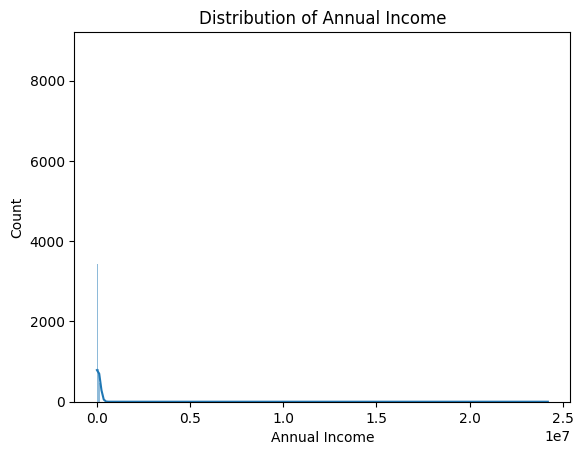

Skewness of Annual Income: 12.712928185422022


In [648]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Annual_Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.show()


skewness = df['Annual_Income'].skew()
print("Skewness of Annual Income:", skewness) #<---  If the distribution of Annual_Income is skewed, then median is a better choice than mean


In [649]:
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True) #<--- imputing missing values with median
df['Num_of_Loan'].fillna(0, inplace=True) #<--- imputing missing values with 0
df['Outstanding_Debt'].fillna(0, inplace=True)  #<--- imputing missing values with 0


In [650]:
annual_income_descending = df.sort_values(by='Age', ascending=True) #<--- wanted to check for outliers. found out that it makes no sense
annual_income_descending['Age'].head(), annual_income_descending['Age'].describe()

(47888    -500
 7323     -500
 61997    -500
 61918    -500
 7352     -500
 Name: Age, dtype: object,
 count     150000
 unique      2524
 top           39
 freq        4198
 Name: Age, dtype: object)

In [651]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

unreasonable_ages_mask = (df['Age'] < 18) | (df['Age'] > 100)
unreasonable_ages = df[unreasonable_ages_mask]

unreasonable_ages_count = unreasonable_ages.shape[0]
unreasonable_ages_count


11859

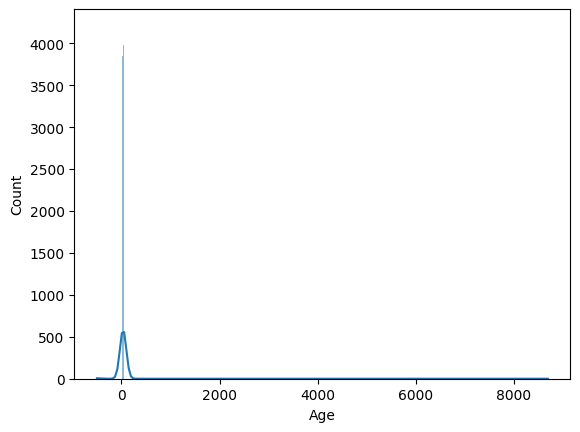

In [652]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [653]:
unreasonable_ages_mask = (df['Age'] < 18) | (df['Age'] > 100) #<--- looked like there still were legit values below 18, but we will focus on adults

reasonable_age_median = df.loc[~unreasonable_ages_mask, 'Age'].median()

df.loc[unreasonable_ages_mask, 'Age'] = reasonable_age_median

post_imputation_check = df['Age'].between(18, 100).all()
post_imputation_check


False

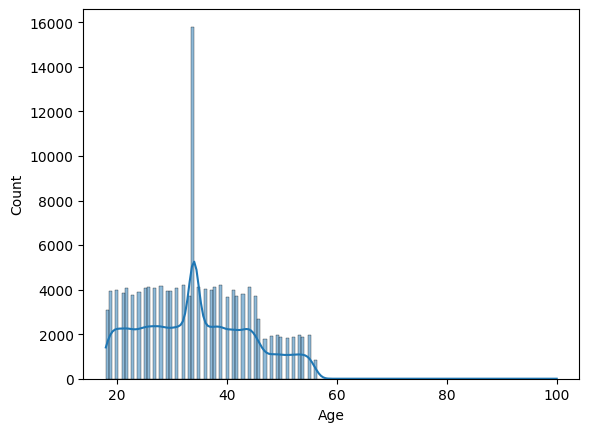

In [654]:
sns.histplot(df['Age'], kde=True) #<--- looks better
plt.show()

**2. Normalize or Standardize Numerical Data:**

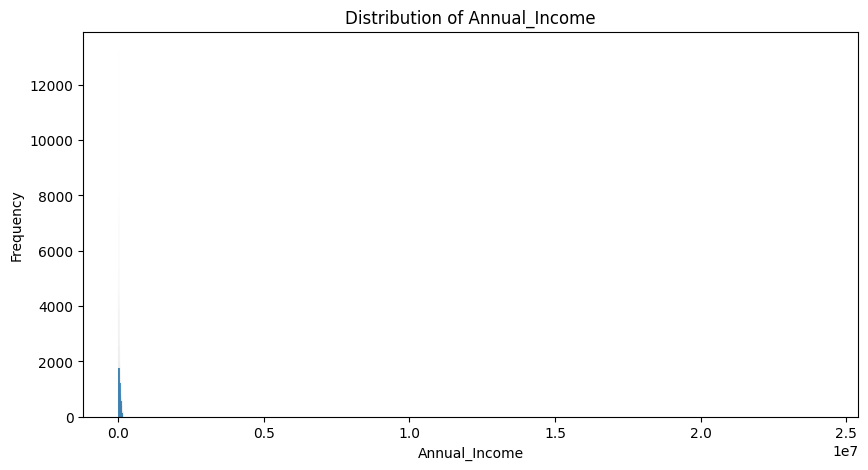

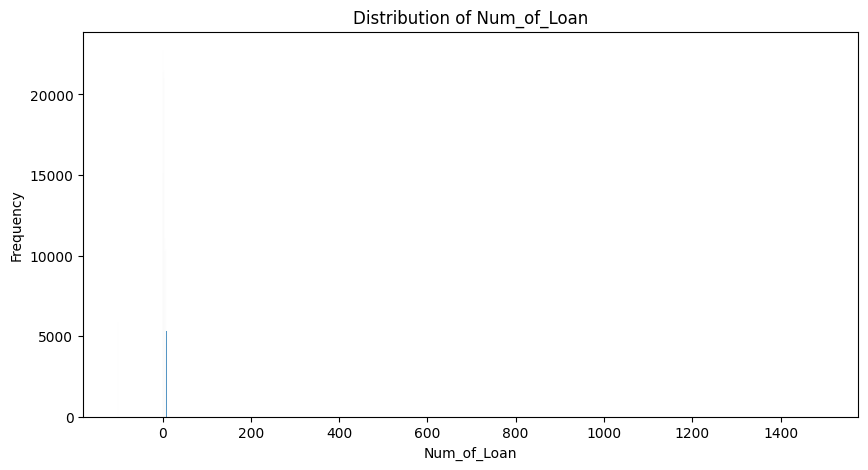

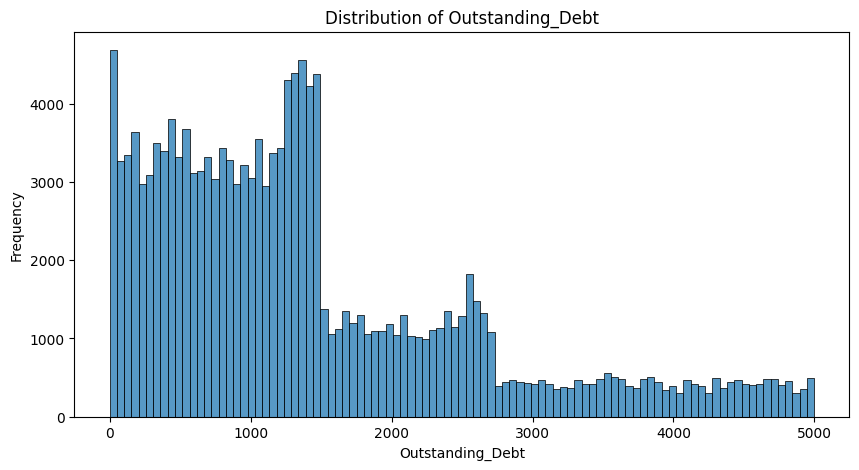

In [657]:
#<--- checking distributions
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [658]:
# Calculate skewness for each numerical column
for column in numerical_columns:
    skewness = df[column].dropna().skew()  # dropna() to ignore missing values
    print(f'Skewness of {column}: {skewness}')


Skewness of Annual_Income: 13.190723324954112
Skewness of Num_of_Loan: 16.023267428335366
Skewness of Outstanding_Debt: 1.2047270286455203
